# Inference and Hypothesis Testing

**OBJECTIVES**

- Review confidence intervals
- Review standard error of the mean
- Introduce Hypothesis Testing
 - Hypothesis test with one sample
 - Difference in two samples
 - Difference in multiple samples

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

### Probability Distributions with `scipy`

The `scipy` library provides a wide variety of probability distributions.  These distributions have specific parameters involved in creating them, but all of the distributions share basic methods:

- `.rvs`: generate random samples from the distribution
- `.pdf` or `.pmf`: probability mass or density function at some value(s)
- `.cdf`: cumulative distribution functions
 

**EXAMPLE**

Consider a normal distribution with mean of 3 and standard deviation of 5 -- often written as $N(3, 5)$. 

In [18]:
#create distribution


In [19]:
#generate 20 random values


In [20]:
#probability of observing a 4?


In [21]:
#probability of observing a 3 or less?


In [78]:
#plot the distribution
#our domain is bounded by 3 standard deviations of the mean


In [77]:
#plot the cumulative distribution 


**PROBLEM**

Create a binomial probability distribution to model tossing a a fair coin 100 times (use arguments `n = 100, p = .5`).  Use this distribution to find the probability of:

1. Seeing 30 heads.
2. Seeing 40 or fewer heads.

### Standardization

Suppose we have two distributions on different domains from which we would like to compare scores.  
- An English Class has test scores normally distributed with mean 95 and standard deviation 5.

- A Mathematics Class has test scores normally distributed with mean 80 and standard deviation 7.

In [24]:
#math class
math_class = stats.norm(loc = 80, scale = 7)

(array([ 3.,  3., 11., 15., 14., 24., 16., 10.,  3.,  1.]),
 array([60.95081505, 64.79019458, 68.62957412, 72.46895365, 76.30833319,
        80.14771273, 83.98709226, 87.8264718 , 91.66585134, 95.50523087,
        99.34461041]),
 <BarContainer object of 10 artists>)

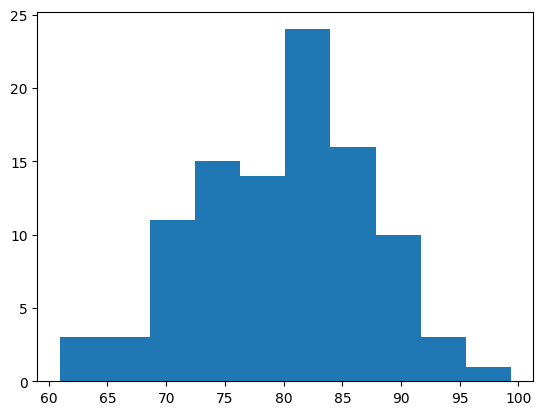

In [25]:
#histogram
plt.hist(math_class.rvs(100))

In [26]:
#english scores
english_class = stats.norm(loc = 95, scale = 5)

In [79]:
#make a dataframe
tests_df = pd.DataFrame({'math': math_class.rvs(1000, random_state = 11), 'english': english_class.rvs(1000, random_state = 11)})
tests_df.head()

math     english
0  92.246183  103.747274
1  77.997489   93.569635
2  76.608044   92.577174
3  61.426770   81.733407
4  79.942008   94.958577

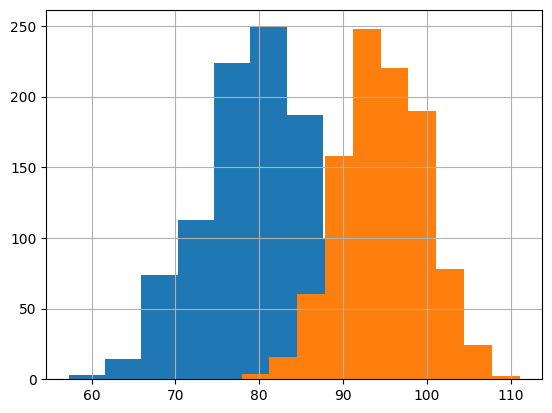

In [28]:
#plot the histograms together
plt.hist(tests_df['math'])
plt.hist(tests_df['english'])
plt.grid();

In [29]:
#problem: Student A -- 82 in math How many std's away from the mean is 82???
#.        Student B -- 97 in English
#Who did better?

In [76]:
#scale the entire dataset


### Testing Significance

Now that we've tackled confidence intervals, let's wrap up with a final test for significance.  With a Hypothesis Test, the first step is declaring a null and alternative hypothesis.  Typically, this will be an assumption of no difference.

$$H_0: \text{Null Hypothesis}$$
$$H_a: \text{Alternative Hypothesis}$$

For example, our data below have to do with a reading intervention and assessment after the fact.  Our null hypothesis will be:

$$H_0: \mu_1 = \mu_2$$
$$H_a: \mu_1 \neq \mu_2$$

In [74]:
#read in the data
reading = pd.read_csv('https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa25/refs/heads/main/data/DRP.csv')
reading.head()

id  group  g  drp
0   1  Treat  0   24
1   2  Treat  0   56
2   3  Treat  0   43
3   4  Treat  0   59
4   5  Treat  0   58

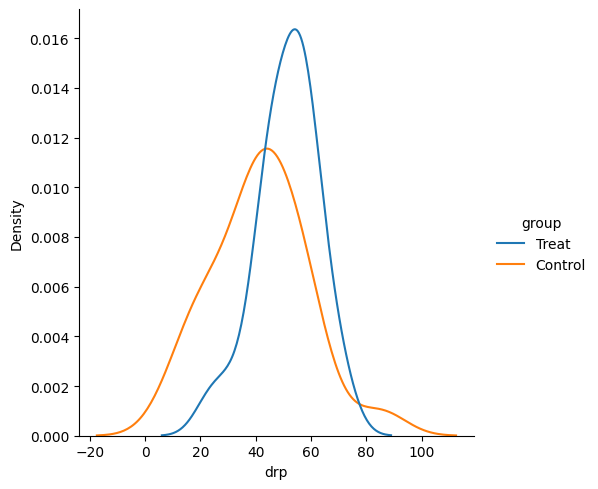

In [59]:
#distributions of groups
sns.displot(x = 'drp', hue = 'group', data = reading, kind='kde')

For our hypothesis test, we need two things:

- Null and alternative hypothesis

$$H_0: \mu_t = \mu_c $$
$$H_a: \mu_t \neq \mu_c $$
- Significance Level

 - $\alpha = 0.05$
Just like before, we will set a tolerance for rejecting the null hypothesis.

In [60]:
#split the groups
treatment = reading.loc[reading['g'] == 0]['drp']
control = reading.loc[reading['g'] == 1]['drp']

In [61]:
#run the test
stats.ttest_ind(treatment, control)

TtestResult(statistic=2.2665515995859433, pvalue=0.02862948283224572, df=42.0)

In [62]:
#alpha at 0.05

SUPPOSE WE WANT TO TEST IF INTERVENTION MADE SCORES HIGHER

$$H_0: \mu_0 = \mu_1$$
$$H_1: \mu_0 < \mu_1$$

In [63]:
#alpha at 0.05

In [64]:
t_score, p = stats.ttest_ind(treatment, control)

In [65]:
p/2

0.01431474141612286

**PROBLEMS**

1. Insurance adjusters are concerned about the high estimates they are receiving from Jocko's Garage.  To see if the estimates are unreasonably high, each of 10 damaged cars was take to Jocko's and to another garage and the estimates were recorded in the `jocko.csv` file.  

  - Create a new column that represents the difference in prices from the two garages. Find the mean and standard deviation of the difference.
  - Test the null hypothesis that there is no difference between the estimates at the 0.05 significance level.

In [75]:
mileage_data = 'https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa25/refs/heads/main/data/JOCKO.csv'